## Primera Etapa del Proyecto 02
## Byron Josué Arguedas López
## C10606

### Introducción

Un filtro es un elemento, ya sea físico o de software, que permite modificar el contenido en frecuencia o características de una señal (Coto, José. "s.f").

En el dominio del tiempo un filtro se puede representar como h(t) en la siguiente función:

                                            y(t) = x(t)*h(t)
                               
El problema con lo que representa generar un proceso de filtrado en el dominio del tiempo es la cantidad de procesamiento y tiempo que conlleva realizar la operación convolución. Visto desde el dominio de la frecuencia F(h(t)) obtendriamos:

                                            Y(ω) = X(ω)H(ω)
                                            
En el dominio de la frecuencia el proceso de filtrado se trabaja mediante una simple multiplicación, lo que representa una enorme diferencia en terminos de velocidad de procesamiento.

El filtro en específico que vamos a estar utilizando en este notebook se le reconoce como un filtro de paso bajo,
Un filtro pasa bajo ideal permite el paso de un determinado conjunto de frecuencias contenido en la señal de entrada, mientras que impide el paso del resto (Coto, José. "s.f"). El funcionamiento de un filtro de paso bajo se basa en asumir que por lo general el ruido de una señal tendrá con sigo una frecuencia mayor al de la señal deseada, por ello al reducir o eliminar las componentes de alta frecuencia de la señal reducimos o eliminamos con sigo el ruido.

### Desarrollo

El código inicia con la importación de las librerias necesarias para la implementación del código, así como algunos requerimientos para el filtrado mediante el uso del filtro paso bajo.

In [1]:
import numpy as np
from scipy.signal import butter, lfilter
import sympy as sym
from scipy.fft import fft
import matplotlib.pyplot as plt

#requerimientos para el filtrado
order = 6
fs = 30.0   
cutoff = 3.667
T = 5.0
n = int(T * fs)
t = np.linspace(0, T, n, endpoint=False)

Definimos dos funciones encargadas de aplicar el filtro paso bajo, en ellas podemos destacar el uso de la variable "cutoff" que representa la frecuencia de corte en contra de la frecuencia de muestreo de la señal "fs", la variable "order" representa el orden de aplicado del filtro, se puede entender como la suavidad con la que es aplicado el filtro.
También podemos destacar los coeficientes a y b que en el contexto de filtros digitales, como el filtro "butterworth", son coeficientes que se utilizan para definir la función de transferencia del filtro y, en última instancia, controlar su comportamiento.

In [2]:
def butter_lowpass(cutoff, fs, order=5):
    return butter(order, cutoff, fs=fs, btype='low', analog=False)

In [3]:
def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

Generamos una señal sinuidal con ruido e imprimimos su salida

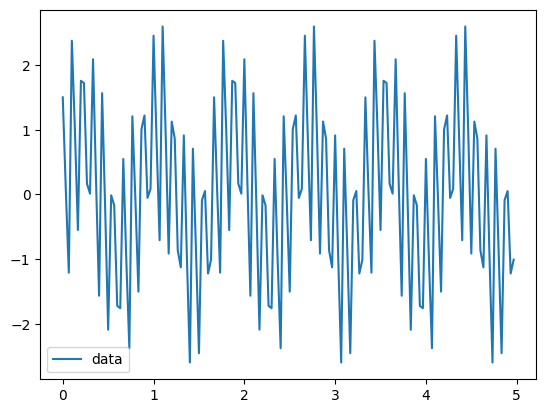

In [4]:
# sin wave
x = np.sin(1.2*2*np.pi*t) + 1.5*np.cos(9*2*np.pi*t) + 0.5*np.sin(12.0*2*np.pi*t)
plt.plot(t, x, label='data')
plt.legend()
plt.show()

Se obtiene la transformada de fourier de la función con ruido y las frecuencias correspondientes al espectro, se procede a aplicar un valor absoluto sobre el la transformada y se encuentra la frecuencia máxima en el espectro.

In [5]:
x_fft = fft(x)
frequencies = np.fft.fftfreq(len(x), 1/fs)
magnitude_spectrum = np.abs(x_fft)

f_max_x = frequencies[np.argmax(magnitude_spectrum)]

Se procede a gráficar el espectro de la señal sinuidal con ruido.

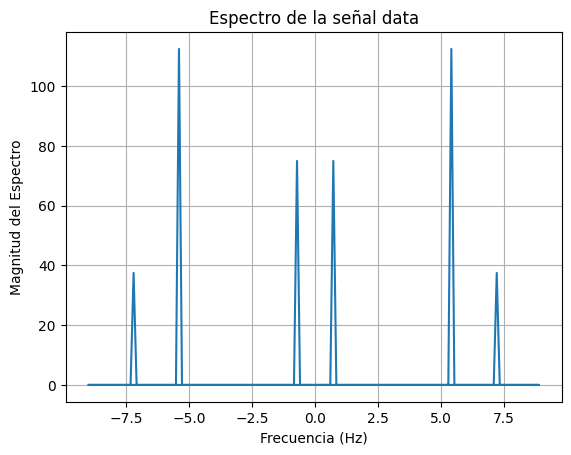

In [6]:
x_fft = fft(x)

magnitude_spectrum = np.abs(x_fft)

fs = 2*f_max_x
N = len(x)  
frequencies = np.fft.fftfreq(N, 1/fs)

plt.plot(frequencies, magnitude_spectrum)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud del Espectro')
plt.title('Espectro de la señal data')
plt.grid()
plt.show()

Aplicamos el filtro paso bajo butterworht a la señal sinuidal con ruido y gráficamos la salida del proceso de filtrado.

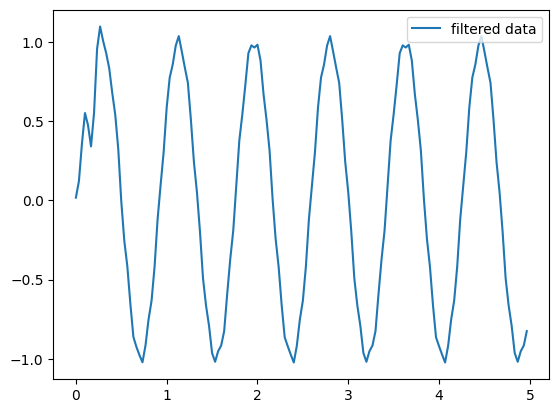

In [7]:
b, a = butter_lowpass(cutoff, fs, order)
y = butter_lowpass_filter(x, cutoff, fs, order)
plt.plot(t, y, label='filtered data')
plt.legend()
plt.show()

Se obtiene la transformada de fourier de la función filtrada y las frecuencias correspondientes al espectro, se procede a aplicar un valor absoluto sobre el la transformada y se encuentra la frecuencia máxima en el espectro.

In [8]:
y_fft = fft(y)
frequencies = np.fft.fftfreq(len(y), 1/fs)
magnitude_spectrum = np.abs(y_fft)

f_max_y = frequencies[np.argmax(magnitude_spectrum)]

se procede a gráficar el espectro de la señal filtrada.

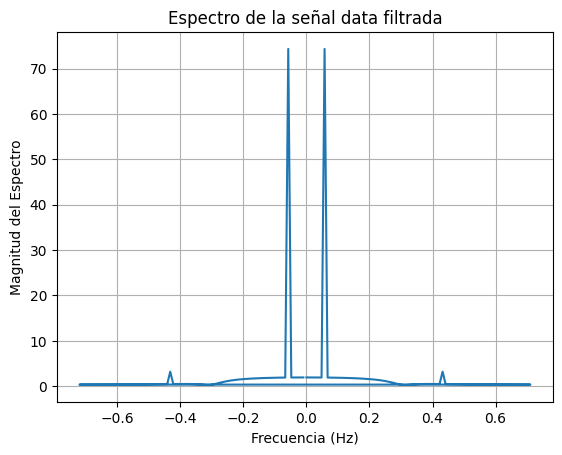

In [9]:
y_fft = fft(y)

magnitude_spectrum = np.abs(y_fft)

fs = 2*f_max_y
N = len(y)  
frequencies = np.fft.fftfreq(N, 1/fs)

plt.plot(frequencies, magnitude_spectrum)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud del Espectro')
plt.title('Espectro de la señal data filtrada')
plt.grid()
plt.show()

### Conclusión

1) Se deja clara la importancia de transformar las funciones del tiempo al dominio de la frecuencia con tal de obtener procesos más rápidos e eficientes.
2) Se deja claro el funcionamiento de un filtro paso bajo, logrando entender que es la reducción de las partes de alta frecuencia de la señal, lo que equivale a reducir el ruido de la señal. Grácias a la gráfica de la salida de la señal después de ser procesada por el filtro podemos observar como se reduce el ruído perfectamente.
3) Dado que el Teorema del Muestreo de Nyquist establece que la frecuencia de muestreo (fs) debe ser al menos el doble de la frecuencia máxima presente en la señal que se desea muestrear. Se busca teniendo la transformada de la función, la máxima frecuencia presente en la señal.
4) Podemos observar como la gŕafica del espectro de la señal filtrada se asemeja mucho al espectro de una función seno o coseno, lo que nos indica que el filtrado de la sinuidal con ruido funcionó correctamente devolviendo una señal muy cercana a la función deseada.